<a href="https://colab.research.google.com/github/Bahaakhalled/Bahaakhalled.github.io/blob/main/Machinfy_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from wordcloud import WordCloud 

In [101]:
data=pd.read_csv('Text_Similarity_Dataset.csv')
data.head(1)
copydata=data

In [102]:
data.shape

(4023, 3)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4023 entries, 0 to 4022
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Unique_ID  4023 non-null   int64 
 1   text1      4023 non-null   object
 2   text2      4023 non-null   object
dtypes: int64(1), object(2)
memory usage: 94.4+ KB


In [104]:
temp=data[data.duplicated()]
temp

,Unique_ID,text1,text2


In [105]:
text1=data['text1']
for i in text1:
  temp=i.split()
  #print(max(temp, key=len))

Method above showed how big words are and that it is needed to remove - and / from the strings to seperate the words

Removed all symbols
---



In [107]:
pattern = r'[' + string.punctuation + ']'
copydata['text1']=data['text1'].map(lambda m:re.sub(pattern," ",m))
copydata['text2']=data['text2'].map(lambda m:re.sub(pattern," ",m))

In [108]:
def biggestword(column,method):
  templst=list()
  for i in column:
    temp=i.split()
    templst.append(method(temp, key=len))
  return(method(templst, key=len))

In [109]:
print(biggestword(copydata['text1'],max))
print(biggestword(copydata['text2'],max))
print(biggestword(copydata['text1'],min))
print(biggestword(copydata['text2'],min))

southernplayalisticadillacmuzik
southernplayalisticadillacmuzik
a
2


In [110]:
copydata.head()

,Unique_ID,text1,text2
0,0,savvy searchers fail to spot ads internet sear...,newcastle 2 1 bolton kieron dyer smashed home ...
1,1,millions to miss out on the net by 2025 40 o...,nasdaq planning 100m share sale the owner of ...
2,2,young debut cut short by ginepri fifteen year ...,ruddock backs yapp s credentials wales coach m...
3,3,diageo to buy us wine firm diageo the world s...,mci shares climb on takeover bid shares in us ...
4,4,be careful how you code a new european directi...,media gadgets get moving pocket sized devices ...


Lower Casing

In [111]:
copydata['text1']=copydata['text1'].map(lambda m:m.lower())
copydata['text2']=copydata['text2'].map(lambda m:m.lower())

In [112]:
copydata1=copydata

Remove Stop Words like the you our etc


In [113]:
def tokenization(text):
    tokens = re.split(' ',text)
    return tokens
#applying function to the column
copydata1['text1']= copydata['text1'].apply(lambda x: tokenization(x))
copydata1['text2']= copydata['text2'].apply(lambda x: tokenization(x))

In [114]:
def removewhitespaces(ser):
  for i in ser:
    for j in i:
      j = j.strip()
  return(ser)

In [115]:
copydata1['text1']= removewhitespaces(copydata['text1'])
copydata1['text2']= removewhitespaces(copydata['text2'])

In [116]:
copydata1['text1'][0][1]

'searchers'

In [117]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [118]:
sw=nltk.corpus.stopwords.words('english')
sw[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [119]:
copytemp1=copydata1['text1'].apply(lambda x: [item for item in x if item not in sw])
copytemp2=copydata1['text2'].apply(lambda x: [item for item in x if item not in sw])

In [120]:
#did not work

#temp=list()
#for sent in copytemp1:
#  for word in sent:
#    if word not in sw:
#     temp.append(word)
#  sent=temp
#  temp.clear()

In [121]:
#This method worked
for sent in copytemp1:
  for word in sent:
    if word in sw:
      print(word)

In [122]:
copydata1['text1']=copytemp1
copydata1['text2']=copytemp2
copydata1

,Unique_ID,text1,text2
0,0,"[savvy, searchers, fail, spot, ads, internet, ...","[newcastle, 2, 1, bolton, kieron, dyer, smashe..."
1,1,"[millions, miss, net, 2025, , 40, , uk, popula...","[nasdaq, planning, , 100m, share, sale, owner,..."
2,2,"[young, debut, cut, short, ginepri, fifteen, y...","[ruddock, backs, yapp, credentials, wales, coa..."
3,3,"[diageo, buy, us, wine, firm, diageo, , world,...","[mci, shares, climb, takeover, bid, shares, us..."
4,4,"[careful, code, new, european, directive, coul...","[media, gadgets, get, moving, pocket, sized, d..."
...,...,...,...
4018,4018,"[labour, plans, maternity, pay, rise, maternit...","[seasonal, lift, house, market, swathe, figure..."
4019,4019,"[high, fuel, costs, hit, us, airlines, two, la...","[new, media, battle, bafta, awards, bbc, leads..."
4020,4020,"[britons, growing, , digitally, obese, , gadge...","[film, star, fox, behind, theatre, bid, leadin..."
4021,4021,"[holmes, hit, hamstring, injury, kelly, holmes...","[tsunami, , hit, sri, lanka, banks, , sri, lan..."


In [123]:
temp=copydata1['text1'].apply(pd.Series).stack()
temp1=copydata1['text2'].apply(pd.Series).stack()

In [124]:
temp=pd.concat([temp,temp1])

In [126]:
temp2=temp.str.cat(sep=' ')

In [140]:
word_cloud = WordCloud(width=800, height=400,
        background_color="white",
        collocations=False,
        ).generate(temp2)

(-0.5, 799.5, 399.5, -0.5)

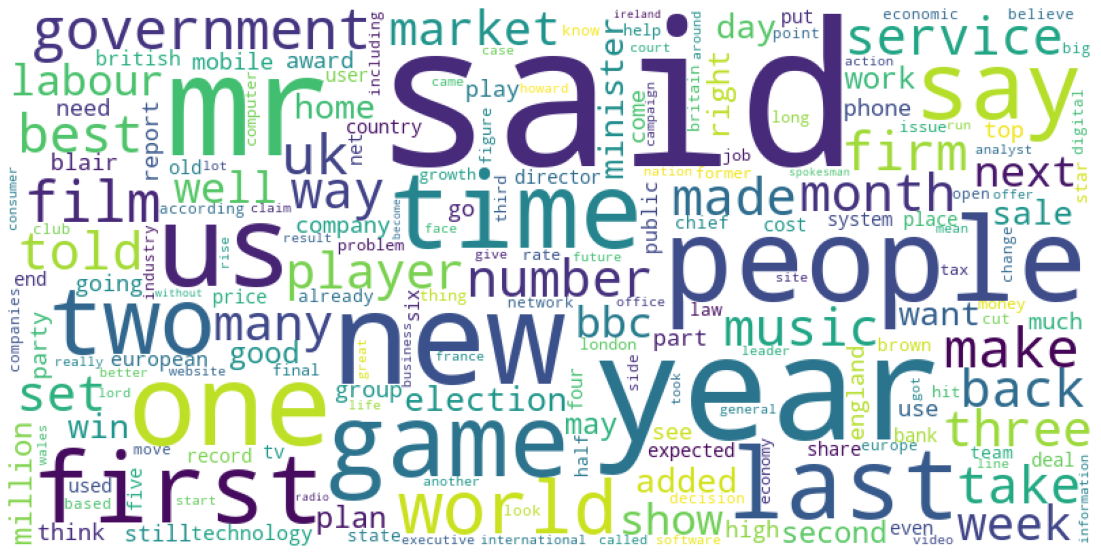

In [144]:
plt.figure( figsize=(20,10) )
plt.imshow(word_cloud)
plt.axis("off")

In [129]:
if 'i' in sw:
  print(True)
else:
  print(False)

True


In [130]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [159]:
new=temp.apply(lambda x: [item for item in x if item !=''])

In [ ]:
new.value_counts()[:20]

In [149]:
from collections import Counter
counts = Counter(temp)
print(counts)

Counter({'': 453274, 'said': 26113, 'mr': 10914, 'would': 9337, 'year': 8350, 'also': 7807, 'people': 7358, 'new': 7179, 'us': 7015, 'one': 6908, 'could': 5466, 'last': 5030, 'first': 4940, 'time': 4822, 'two': 4647, 'world': 4370, 'government': 4197, 'uk': 4026, 'years': 3661, 'best': 3537, 'make': 3428, 'told': 3310, 'film': 3284, 'get': 3219, 'like': 3213, 'game': 3208, 'made': 3165, 'back': 3101, 'music': 3021, 'many': 2989, 'three': 2987, '000': 2918, 'labour': 2914, 'next': 2861, '1': 2816, 'well': 2805, 'bbc': 2785, 'set': 2783, 'number': 2782, 'take': 2706, 'way': 2679, 'added': 2648, '2': 2523, 'market': 2518, 'says': 2495, 'may': 2481, 'company': 2455, 'election': 2417, 'home': 2375, 'good': 2328, 'games': 2323, 'going': 2301, 'party': 2300, '2004': 2285, 'still': 2239, 'much': 2237, 'go': 2234, '6': 2230, 'blair': 2227, 'england': 2223, 'second': 2222, 'work': 2209, 'win': 2208, 'top': 2207, 'firm': 2205, 'think': 2196, 'since': 2194, 'show': 2191, 'week': 2170, 'use': 2099,

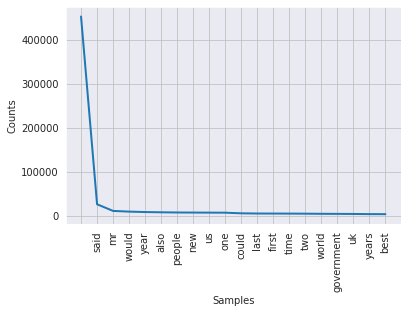

In [137]:
sns.set_style('darkgrid')
nlp_words=nltk.FreqDist(temp)
nlp_words.plot(20);